In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
file_path = "Life Expectancy Data.csv"
df = pd.read_csv(file_path)

In [ ]:
df_clean = df.drop(columns=['Country'])


In [ ]:
label_encoder = LabelEncoder()
df_clean['Status'] = label_encoder.fit_transform(df_clean['Status'])

In [ ]:
df_clean.fillna(df_clean.mean(), inplace=True)


In [ ]:
X = df_clean.drop(columns=['Life expectancy'])
y = df_clean['Life expectancy']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
"""
if we want to save the preprocessed dataset
# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the scaled features and target variable into one DataFrame
preprocessed_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Save the preprocessed DataFrame to a CSV file
output_file_path = "E:/faculty/3 first term/DM/Data_Mining_project/DataSets/DataSetForRegression/PreProcessingOutput/Preprocessed_Life_Expectancy.csv"
preprocessed_df.to_csv(output_file_path, index=False)

print("Preprocessed data has been saved successfully.")
"""

'\nif we want to save the preprocessed dataset\n# Convert the scaled features back to a DataFrame\nX_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)\n\n# Combine the scaled features and target variable into one DataFrame\npreprocessed_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)\n\n# Save the preprocessed DataFrame to a CSV file\noutput_file_path = "E:/faculty/3 first term/DM/Data_Mining_project/DataSets/DataSetForRegression/PreProcessingOutput/Preprocessed_Life_Expectancy.csv"\npreprocessed_df.to_csv(output_file_path, index=False)\n\nprint("Preprocessed data has been saved successfully.")\n'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
joblib.dump(linear_regression_model, 'linear_regression_model.pkl')
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
y_pred_lr = linear_regression_model.predict(x_test)
y_pred_dt = decision_tree_model.predict(x_test)

In [ ]:
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [ ]:
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

In [ ]:
print("Linear Regression Performance:")
print(f"R^2 Score: {r2_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")

Linear Regression Performance:
R^2 Score: 0.8240562394240223
Mean Absolute Error (MAE): 2.86
Mean Squared Error (MSE): 15.24
Root Mean Squared Error (RMSE): 3.90


In [ ]:
print("\nDecision Tree Regressor Performance:")
print(f"R^2 Score: {r2_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")


Decision Tree Regressor Performance:
R^2 Score: 0.9281070822613484
Mean Absolute Error (MAE): 1.52
Mean Squared Error (MSE): 6.23
Root Mean Squared Error (RMSE): 2.50


In [ ]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Predicted Values (y_pred)')

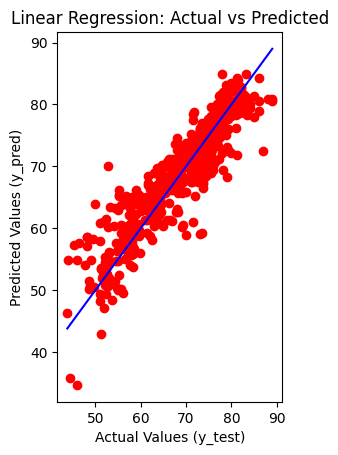

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')

Text(0, 0.5, 'Predicted Values (y_pred)')

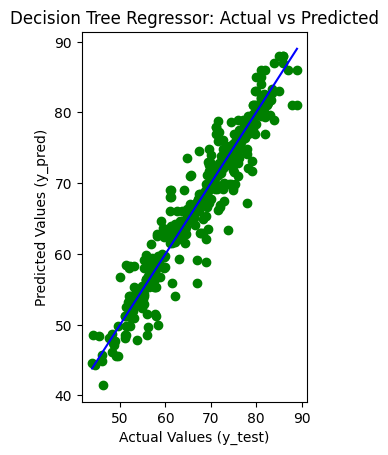

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')


In [ ]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
input_data = [
    2013,  # Year
    1,     # Status (1 for Developing, 0 for Developed)
    271,   # Adult Mortality
    67,    # Infant deaths
    0.01,   # Alcohol
    73.52358168,   # Percentage expenditure
    62,    # Hepatitis B
    492,  # Measles
    18.6,  # BMI
    86,   # Under-five deaths
    58,    # Polio
    8.18,  # Total expenditure
    62,  # Diphtheria
    0.2,   # HIV/AIDS
    612.696514,  # GDP
    327582,  # Population
    17.5,    # Thinness 1-19 years
    17,     # Thinness 5-9 years
    0.476,   # Income composition of resources
    10   # Schooling
]

In [ ]:
columns = [
    "Year", "Status", "Adult Mortality", "infant deaths", "Alcohol",
    "percentage expenditure", "Hepatitis B", "Measles", "BMI", 
    "under-five deaths", "Polio", "Total expenditure", "Diphtheria", 
    "HIV/AIDS", "GDP", "Population", "thinness  1-19  years", 
    "thinness 5-9  years", "Income composition of resources", "Schooling"
]

In [ ]:
input_df = pd.DataFrame([input_data], columns=columns)


In [ ]:
input_scaled = scaler.transform(input_df)


In [ ]:
predicted_life_expectancy_lr = linear_regression_model.predict(input_scaled)
predicted_life_expectancy_dt = decision_tree_model.predict(input_scaled)


In [ ]:

print(f"\nPredicted Life Expectancy (Linear Regression): {predicted_life_expectancy_lr[0]:.2f} years")
print(f"Predicted Life Expectancy (Decision Tree Regressor): {predicted_life_expectancy_dt[0]:.2f} years")


Predicted Life Expectancy (Linear Regression): 62.21 years
Predicted Life Expectancy (Decision Tree Regressor): 59.90 years


In [ ]:
if r2_lr > r2_dt:
    print("\nLinear Regression performs better based on R² and is recommended for this problem.")
elif r2_dt > r2_lr:
    print("\nDecision Tree performs better based on R² and is recommended for this problem.")
else:
    print("\nBoth models have similar R² performance; consider other metrics or choose based on simplicity or interpretability.")



Decision Tree performs better based on R² and is recommended for this problem.
